In [1]:
#######################
# standard code block #
#######################

# see https://ipython.readthedocs.io/en/stable/interactive/magics.html
%pylab inline

# sets backend to render higher res images
%config InlineBackend.figure_formats = ['retina']

#######################
#       imports       #
#######################
import pandas as pd
import seaborn as sns
import sklearn

sns.set_style("whitegrid")

Populating the interactive namespace from numpy and matplotlib


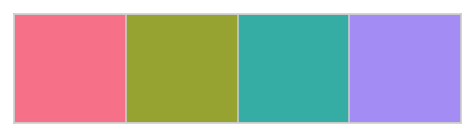

In [2]:
sns.palplot(sns.color_palette("husl", 4))

pal = dict(enumerate(sns.color_palette("husl", 4)))

# Model Linearity

## What do we mean by "linear"?

- Linear operations include
    - matrix multiplication, $\mathbf{w}^\top\mathbf{x}$
    - addition, $\mathbf{x}+b$
- A **Linear function** is any function with the form $f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}+b$. [[more info](https://en.wikipedia.org/wiki/Linear_function)]

<small> In this notebook, the weight matrix $\mathbf{w}$ will be a $1 \times n_f$ dimensional matrix where $n_f$ is the number of features. The bias $b$ will be a scalar. If $n_f=1$ then this definition reduces to scalar math  $f(x) = wx+b$.</small>

- Any combination of linear operations can always be reduced to a single $f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x}+b$ for some $\mathbf{w}$ and $b$.

- The problem: 
    - What if we want a *non*linear function?
    - But we only have linear pieces?
- This case is a fundamental limitation of models built on linear functions.

## Linear Models

- A model that is restricted to linear operations cannot learn non-linear functions.

- Which models are linear?
    - Linear regression (of course!)
    - Logistic regression
    - Linear Support Vector Machines (of course!)
    - (very) old Neural Networks
    - Gaussian Naïve Bayes$^*$
        - Not technically linear but restricted to only learning a single mode.

To see this in action, we'll make a few blobs of data.

Text(0.5, 1.0, 'Four random gaussian clusters')

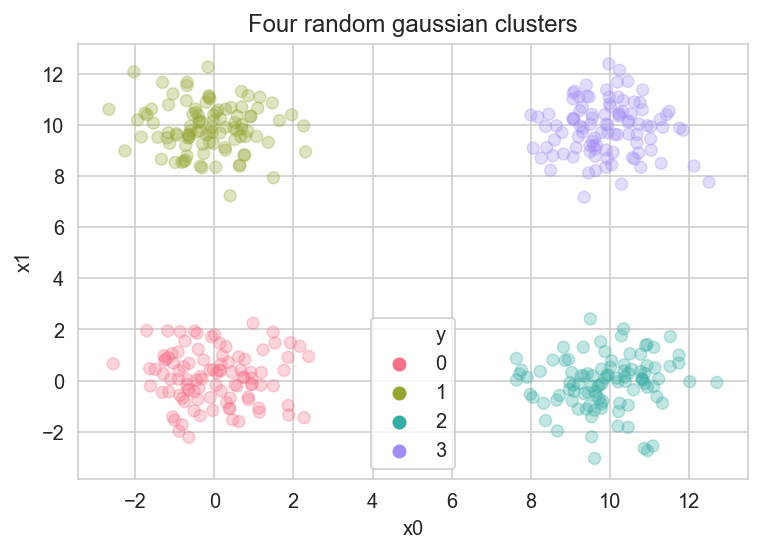

In [4]:
from sklearn import datasets

x, y = datasets.make_blobs(
    n_samples=400, n_features=2, centers=[[0, 0], [0, 10], [10, 0], [10, 10]], random_state=0)

blob_df = pd.DataFrame({"x0": x[:,0], "x1": x[:,1], "y":y})

sns.scatterplot(x="x0", y="x1", hue="y", data=blob_df, alpha=.3, edgecolor=None, palette=pal)
title("Four random gaussian clusters")


Then we'll subset the blobs into a classification problem that can be captured by linear functions.

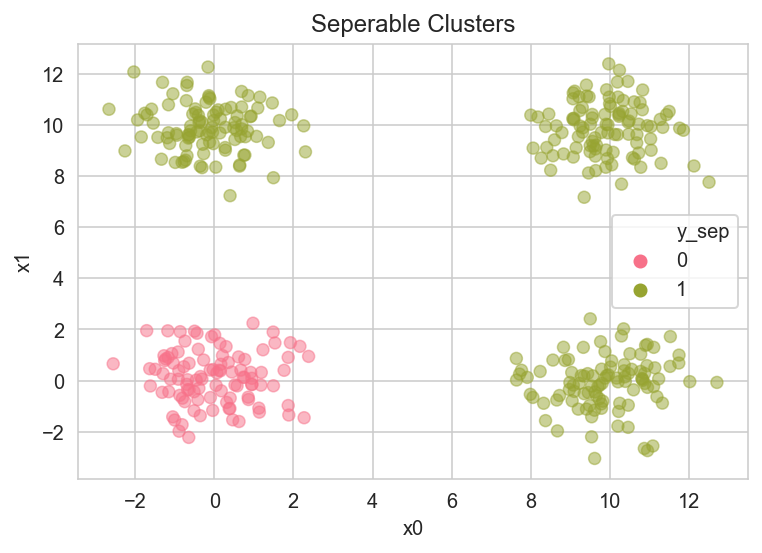

In [5]:
blob_df["y_sep"] = (blob_df.y > 0).astype("int")

sns.scatterplot(x="x0", y="x1", hue="y_sep", data=blob_df, alpha=.5, edgecolor=None, palette=pal)
title("Seperable Clusters");

And and a classification problem that cannot. 

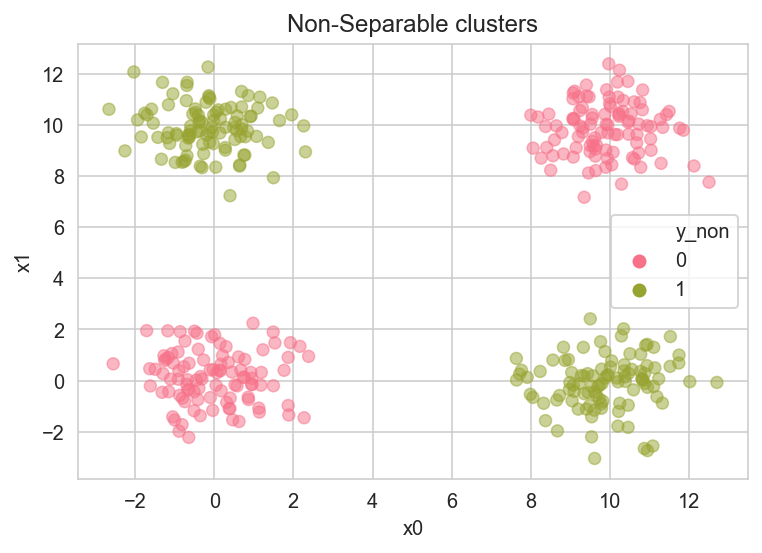

In [6]:
blob_df["y_non"] = blob_df.y.isin([1,2]).astype("int")

sns.scatterplot(x="x0", y="x1", hue="y_non", data=blob_df, alpha=.5, edgecolor=None, palette=pal)
title("Non-Separable clusters");

Let's test this out interactively

In [7]:
from sklearn import metrics

def plot_decision_boundary(pred_func, x, y, ax=None, points=1e3):

    if ax is None:
        fig, ax = subplots()
    
    y_pred = pred_func(x)
    score = metrics.accuracy_score(y_pred.flatten(), y.flatten())

    sns.scatterplot(x=x[:, 0], y=x[:, 1], hue=y, alpha=.5, edgecolor=None, palette=pal, ax=ax)

    side_pts = int(sqrt(points))

    x0_min, x0_max = ax.get_xlim()
    x1_min, x1_max = ax.get_ylim()
    xx, yy = np.meshgrid(
        np.linspace(x0_min, x0_max, num=side_pts),
        np.linspace(x1_min, x1_max, num=side_pts))

    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    ax.text(
        (x0_min + x0_max) / 2,
        (x1_min + x1_max) / 2,
        f"acc: {score:.1%}",
        bbox=dict(boxstyle="round", fc="white", ec="black"))
    

    ax.contourf(xx, yy, Z, alpha=0.2, colors=list(pal.values()), zorder=0)

## Exercise prep

We'll classify points based on $f(\mathbf{x})$:

$$\mathbf{w} = 
\begin{bmatrix}
w_0 \\
w_1
\end{bmatrix}$$

$$ f(\mathbf{x}) = \mathbf{w}^\top\mathbf{x} + b > 0$$

In [8]:
def linear_func(w0, w1, b):
    w = array([[w0, w1]])
    pred_func = lambda x: (w.dot(x.T) + b > 0).astype(int)

    plot_decision_boundary(
        pred_func,
        x=blob_df[["x0", "x1"]].values,
        y=blob_df["y_sep"].values,
        points=1e5)
    plt.title(f"Accuracy for f(x) = [{w0}, {w1}]$x^T$ + {b}")
    return (w0, w1, b)

## Exercise (1m)

Find the values for $\mathbf{w}$ and $b$ that optimize the accuracy.

In [9]:
from ipywidgets import interact
interact(linear_func,w0=(-10,10,1),w1=(-10,10,1),b=(-10,10,1));

interactive(children=(IntSlider(value=0, description='w0', max=10, min=-10), IntSlider(value=0, description='w…

## Solution

One solution is:

$\mathbf{w} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $b=-6$


In [10]:
def nonlinear_func(w0, w1, b):
    w = array([[w0,w1]])
    pred_func = lambda x: (w.dot(x.T) + b > 0).astype(int)
    
    plot_decision_boundary(pred_func, x=blob_df[["x0", "x1"]].values, y=blob_df["y_non"].values, points=1e5)
    plt.title(f"Accuracy for f(x) = [{w0}, {w1}]$x^T$ + {b}")
    return (w0, w1, b)

## Exercise (2m)

Now, using this new dataset, find the values for $\mathbf{w}$ and $b$ that optimize the accuracy.

In [11]:
interact(nonlinear_func,w0=(-20,20,1),w1=(-20,20,1),b=(-20,20,1));

# There is no way a line (linear function) can separate these data points accurately

interactive(children=(IntSlider(value=0, description='w0', max=20, min=-20), IntSlider(value=0, description='w…

## Solution

We top out at 75% with

$\mathbf{w} = \begin{bmatrix} 1 \\ 1 \end{bmatrix}$ and $b=-6$


Why? What would we need to do better?

Options: 
- We might be able to find a better solution if we could draw more lines.
- Or possibly if we weren't limited to straight lines.

Logistic regression [[see lesson](../logistic-regression)] is an example of a linear classifier. Recall that the prediction function for logistic regression is 

$$f(\mathbf{x}) = \sigma(\mathbf{w}^\top\mathbf{x}+b)$$

The sigmoid function *is* nonlinear, **however it only serves to convert the inner linear operation to a binary probability.** We classify observations using some threshold, typically 

$$f(\mathbf{x}) = \begin{cases} 
    0 & \sigma(\mathbf{w}^\top\mathbf{x}+b) < .5 \\
    1 & \text{else}
\end{cases} $$

Which is equivalent to 

$$f(\mathbf{x}) = \begin{cases} 
    0 & \mathbf{w}^\top\mathbf{x}+b < 0 \\
    1 & \text{else}
\end{cases}$$

Instead of digging into the math for *every* model we've covered, below you'll see a selection of some linear and nonlinear models and get a look at how they perform on different kinds of data

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


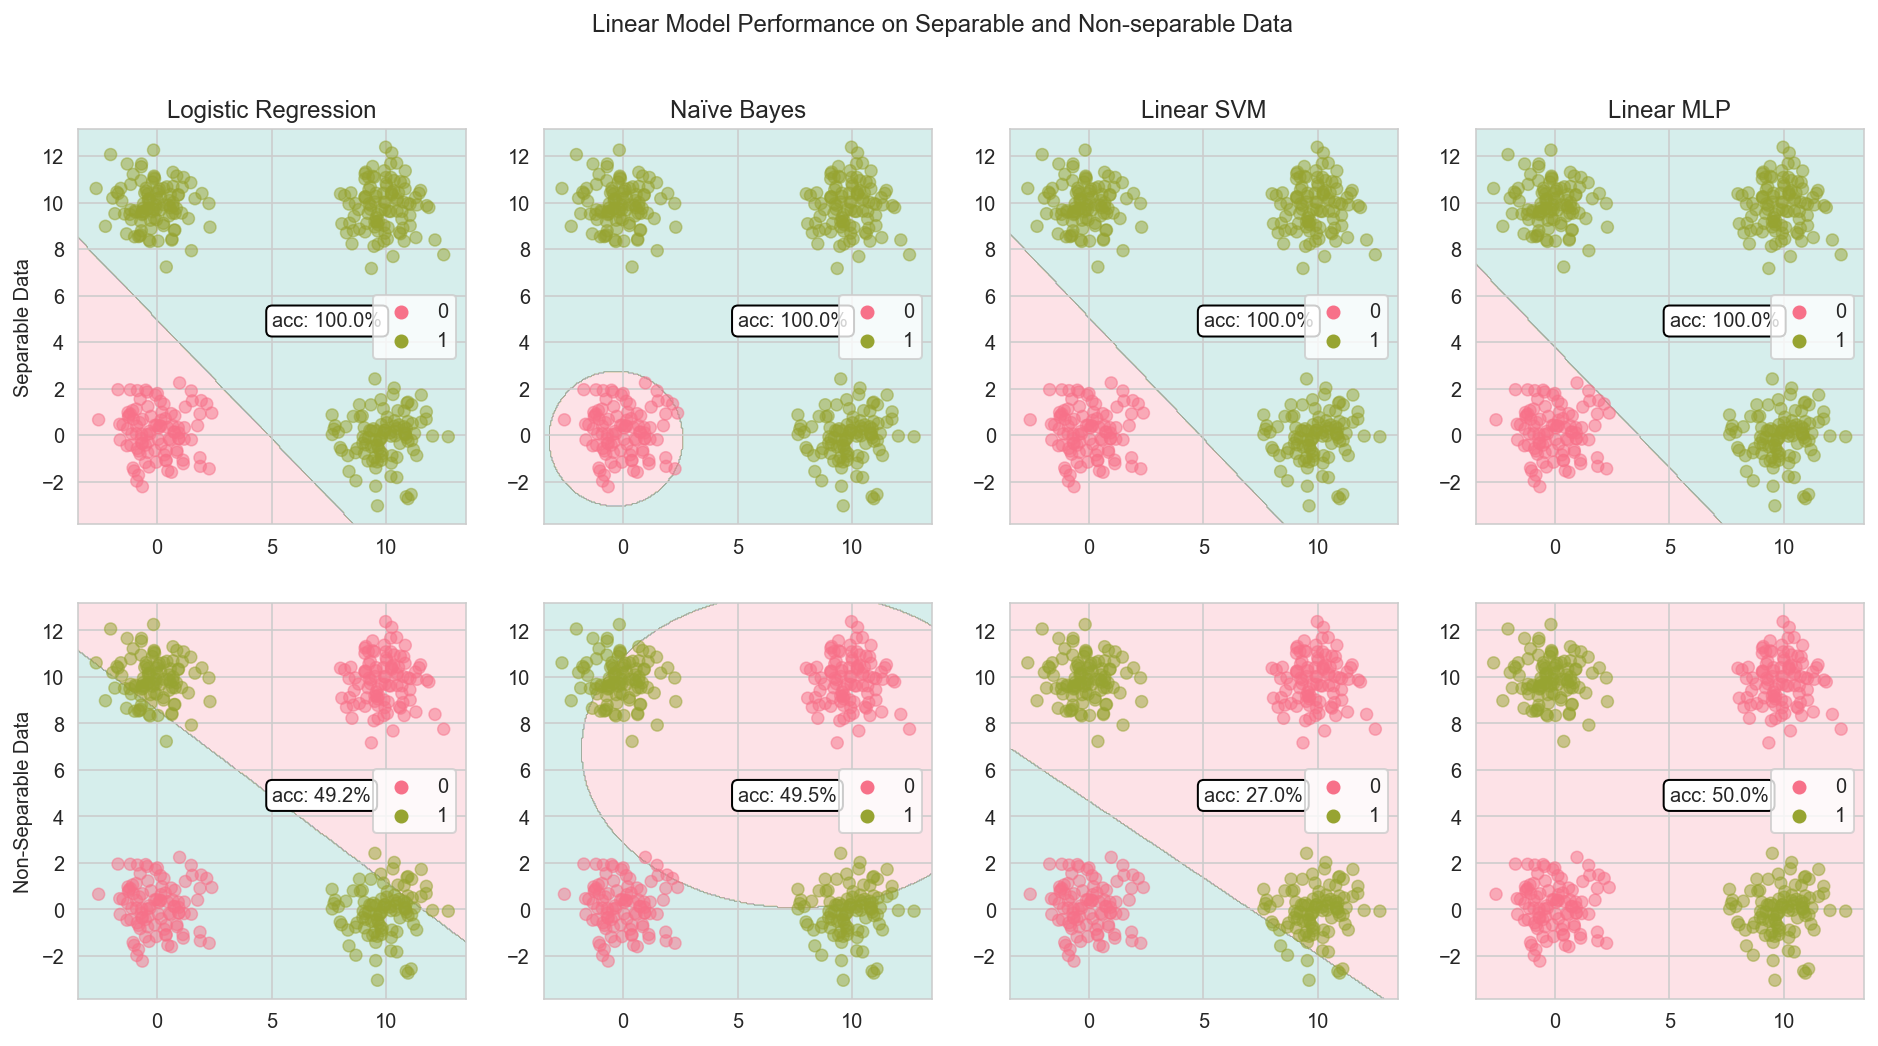

In [12]:
from sklearn import linear_model, naive_bayes, svm, neural_network



########################
models = [("Logistic Regression",
           linear_model.LogisticRegression(solver='lbfgs')),
          ("Naïve Bayes", naive_bayes.GaussianNB()),
          ("Linear SVM", svm.LinearSVC()),
          ("Linear MLP", neural_network.MLPClassifier(activation="identity"))]
######################## MOST IMPORTANT LINE

fig, axes = subplots(
    nrows=2, ncols=len(models), squeeze=True, figsize=(4 * len(models), 8))

for i, model_tup in enumerate(models):
    name, model = model_tup

    axes[0, i].set_title(name)
    
    # plot on seperable dataset
    model.fit(X=blob_df[["x0", "x1"]], y=blob_df["y_sep"])
    plot_decision_boundary(
        model.predict,
        x=blob_df[["x0", "x1"]].values,
        y=blob_df["y_sep"].values,
        ax=axes[0, i],
        points=1e5)
    
    # plot on nonseperable dataset
    model.fit(X=blob_df[["x0", "x1"]], y=blob_df["y_non"])
    plot_decision_boundary(
        model.predict,
        x=blob_df[["x0", "x1"]].values,
        y=blob_df["y_non"].values,
        ax=axes[1, i],
        points=1e5)
    
axes[0,0].set_ylabel("Separable Data")
axes[1,0].set_ylabel("Non-Separable Data")
fig.suptitle("Linear Model Performance on Separable and Non-separable Data")
savefig("images/lin_models.png", dpi=200);

C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\xianj\Anaconda3\envs\metis\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


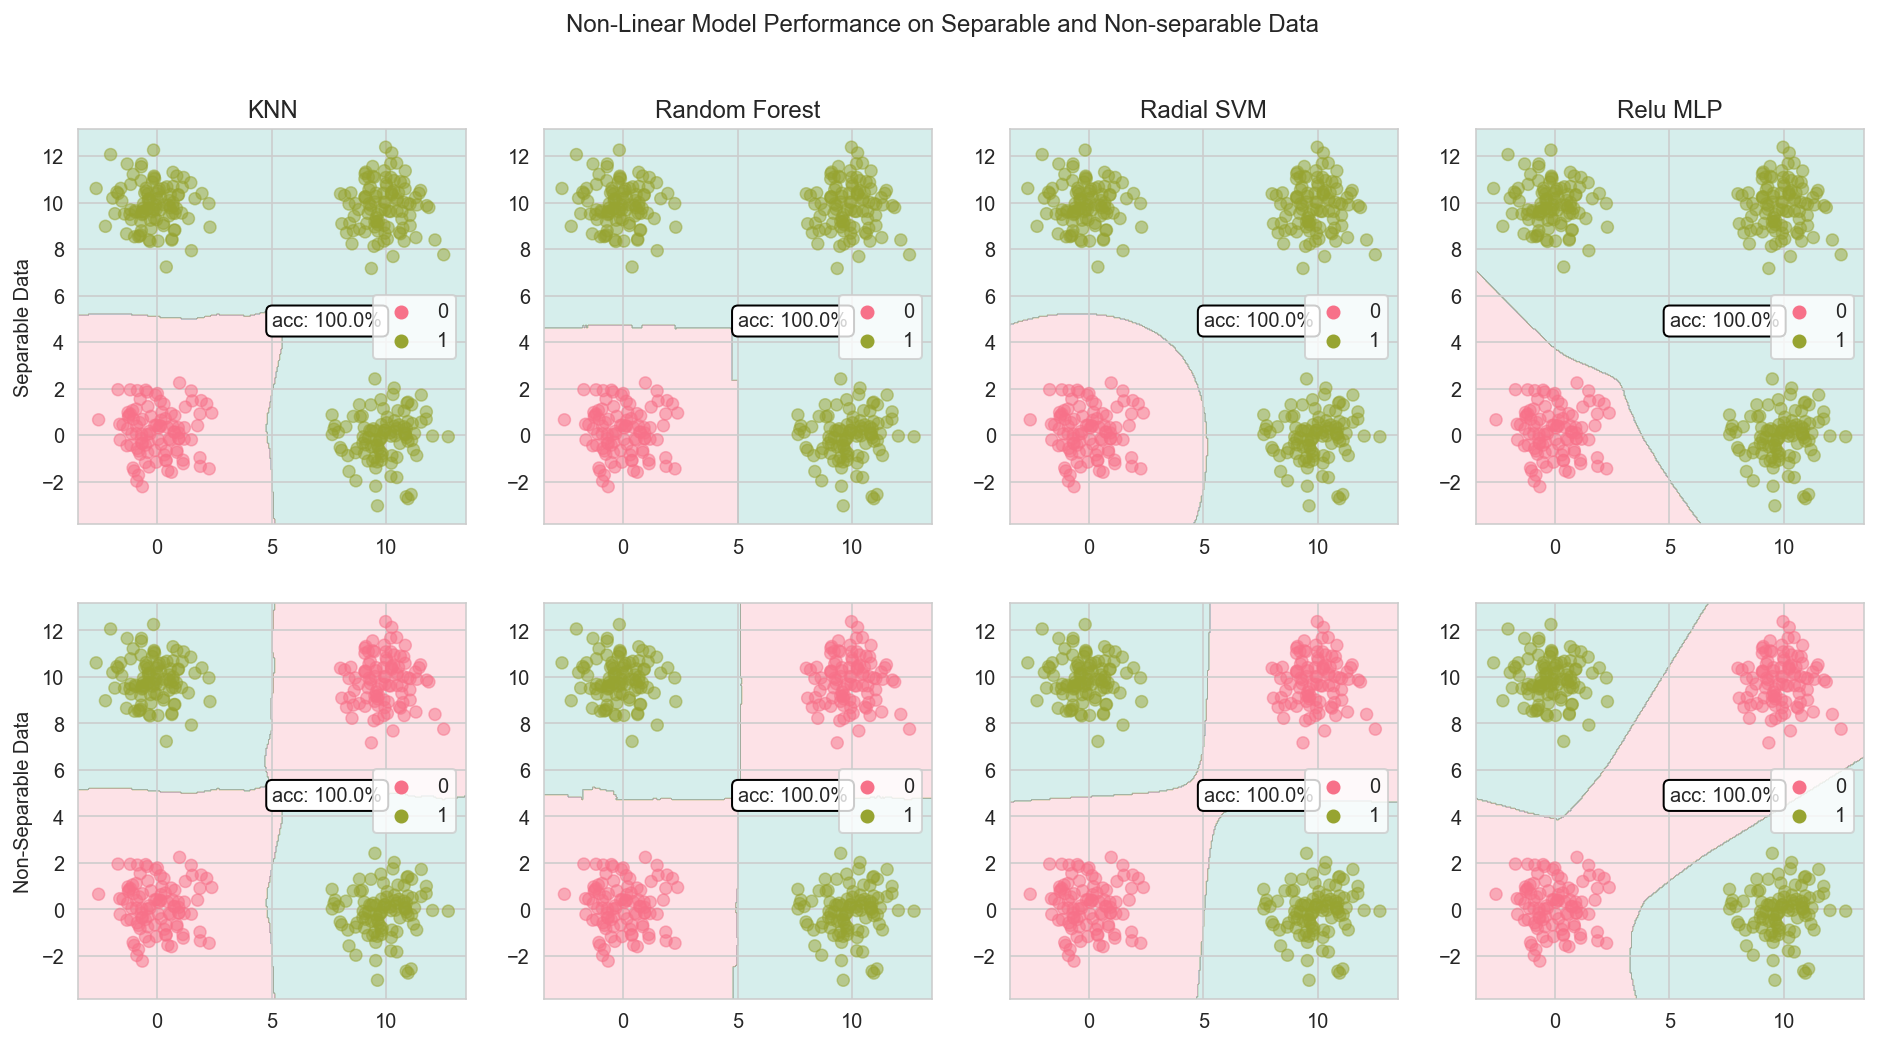

In [13]:
from sklearn import neighbors, ensemble

models = [("KNN",
           neighbors.KNeighborsClassifier()),
          ("Random Forest", ensemble.RandomForestClassifier(n_estimators=100)),
          ("Radial SVM", svm.SVC(gamma="scale")),
          ("Relu MLP", neural_network.MLPClassifier())]

fig, axes = subplots(
    nrows=2, ncols=len(models), squeeze=True, figsize=(4 * len(models), 8))

for i, model_tup in enumerate(models):
    name, model = model_tup

    axes[0, i].set_title(name)
    
    # plot on seperable dataset
    model.fit(X=blob_df[["x0", "x1"]], y=blob_df["y_sep"])
    plot_decision_boundary(
        model.predict,
        x=blob_df[["x0", "x1"]].values,
        y=blob_df["y_sep"].values,
        ax=axes[0, i],
        points=1e5)
    
    # plot on nonseperable dataset
    model.fit(X=blob_df[["x0", "x1"]], y=blob_df["y_non"])
    plot_decision_boundary(
        model.predict,
        x=blob_df[["x0", "x1"]].values,
        y=blob_df["y_non"].values,
        ax=axes[1, i],
        points=1e5)
    
axes[0,0].set_ylabel("Separable Data")
axes[1,0].set_ylabel("Non-Separable Data")
fig.suptitle("Non-Linear Model Performance on Separable and Non-separable Data")
savefig("images/nonlin_models.png", dpi=200);

## What now? (class input)

- Are linear models just worse?
- How do we choose between these two classes of models: linear vs nonlinear?

## What now? (class input)

- Are linear models just worse?
    - Linear models are often more appropriate when:
        - We need a model with a strong bias. 
        - We care more about interpretation than prediction.
- How do we choose between these two classes of models: linear vs nonlinear?
    - Carefully consider your
        - Data: is it likely to require a nonlinear model or not?
        - Priorities: What are you trying to accomplish?
        - Project plan: It's often more appropriate to start with a simpler, linear model, and then move to a more complex model as needed.

# Summary


- Linear functions are made up of two operations: matrix multiplication and addition.
    - Models made up of only linear operations are unable to learn non-linear functions.

- Linear models:
    - Logistic Regression
    - Neural Nets (without activation functions)
    - Linear SVMs
    - Naïve Bayes (nonlinear but similarly limited) 
- Nonlinear
    - KNN
    - Random Forests
    - SVMs with nonlinear kernels
    - Neural Nets (with activation functions)